<a href="https://colab.research.google.com/github/samuelallam-dot/DataScienceandAI/blob/main/Sam_A_EDA_trial_run_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Dataset — Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
from google.colab import files
upload = files.upload()

Saving titanic.txt to titanic.txt


In [4]:
titanic = pd.read_csv("titanic.txt")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Shape of the Dataset

In [7]:
titanic.shape


(891, 12)

Observation:
There are 891 rows and 12 columns. This suggests one row per passenger, which matches expectations.

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Initial thoughts:

Numerical variables: Age, Fare, SibSp, Parch

Categorical variables: Sex, Embarked, Cabin, Pclass

Cabin and Age immediately stand out as having missing values

To quantify this:

In [5]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Observation:

Cabin is mostly missing

Age has a non-trivial number of missing values

Embarked has a small number of missing values

To understand scale:

In [6]:
titanic.isnull().sum() / len(titanic) * 100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


Conclusion so far:

Cabin may be too sparse to use directly

Age missingness will need careful handling later

Missing data is not catastrophic, but definitely relevant

In [9]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This gives summary statistics for the numerical columns.

# Trial-and-Error Interpretation

Age

Mean ≈ 29.7

Median ≈ 28

This suggests a slight right skew

Fare

Mean is much higher than the median

Max value is extremely large relative to Q3

This already hints that Fare is heavily right-skewed, likely due to a small number of very expensive tickets.

# 4. Univariate Analysis
4.1 Age Distribution

In [ ]:
sns.histplot(titanic['Age'], kde=True)
plt.title("Distribution of Passenger Age")
plt.xlabel("Age")
plt.show()


Observation:

Roughly bell-shaped but right-skewed

A noticeable number of children

Long tail for older passengers

Conclusion:
Age is approximately normal but not perfectly so. Using mean alone would be misleading without also considering the median.

# 4.2 Fare Distribution

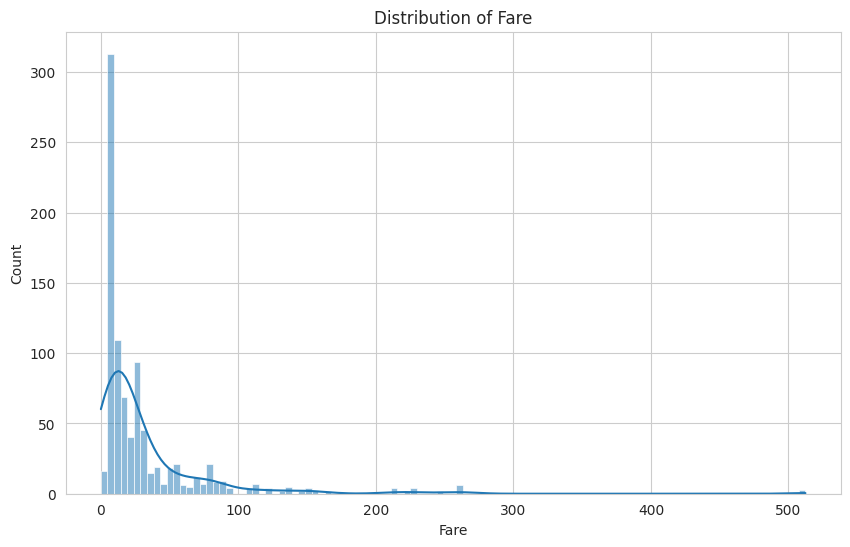

In [10]:
sns.histplot(titanic['Fare'], kde=True)
plt.title("Distribution of Fare")
plt.xlabel("Fare")
plt.show()

This plot is extremely skewed.

To make it readable:

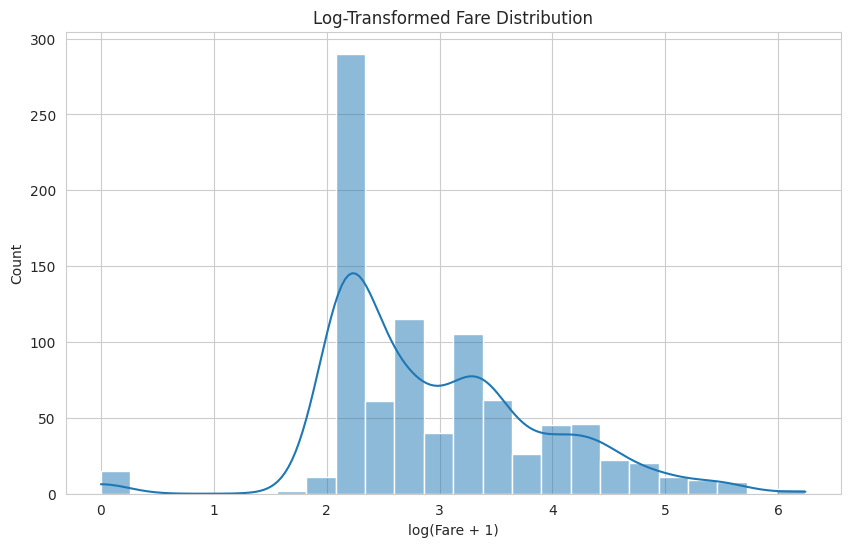

In [12]:
sns.histplot(np.log1p(titanic['Fare']), kde=True)
plt.title("Log-Transformed Fare Distribution")
plt.xlabel("log(Fare + 1)")
plt.show()

Conclusion:

Fare has extreme right skew

Log transformation makes it much more interpretable

Any modelling later would almost certainly require transformation

# 5. Categorical Variables
5.1 Survival Counts

In [14]:
titanic['Survived'].value_counts()

,count
Survived,
0,549
1,342


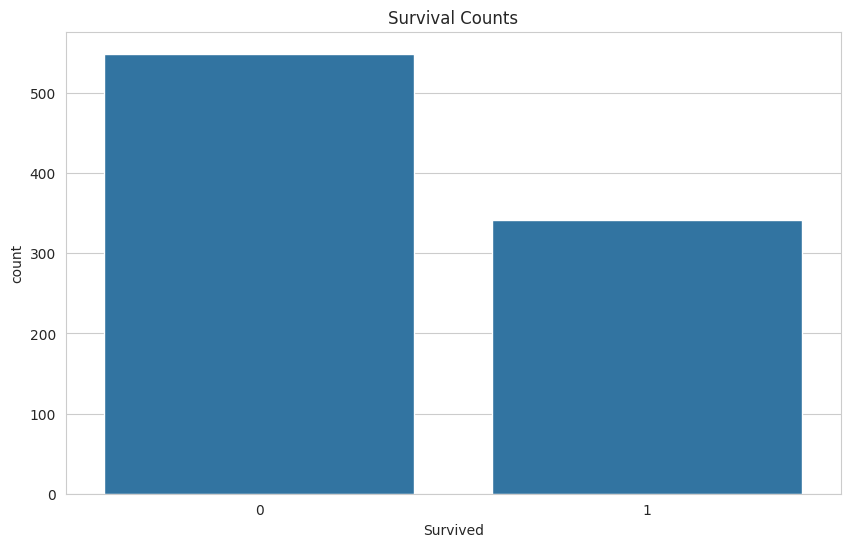

In [13]:
sns.countplot(x='Survived', data=titanic)
plt.title("Survival Counts")
plt.show()

Observation:

More passengers died than survived

Roughly 38% survival rate

This immediately suggests class imbalance, which matters for prediction tasks.

5.2 Sex Distribution

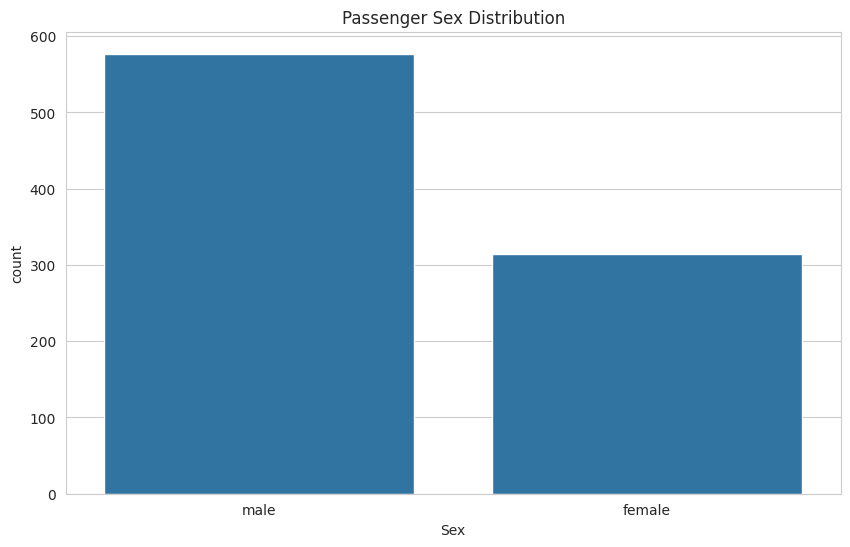

In [15]:
sns.countplot(x='Sex', data=titanic)
plt.title("Passenger Sex Distribution")
plt.show()

More males than females on board.

6. Bivariate Analysis
6.1 Sex vs Survival

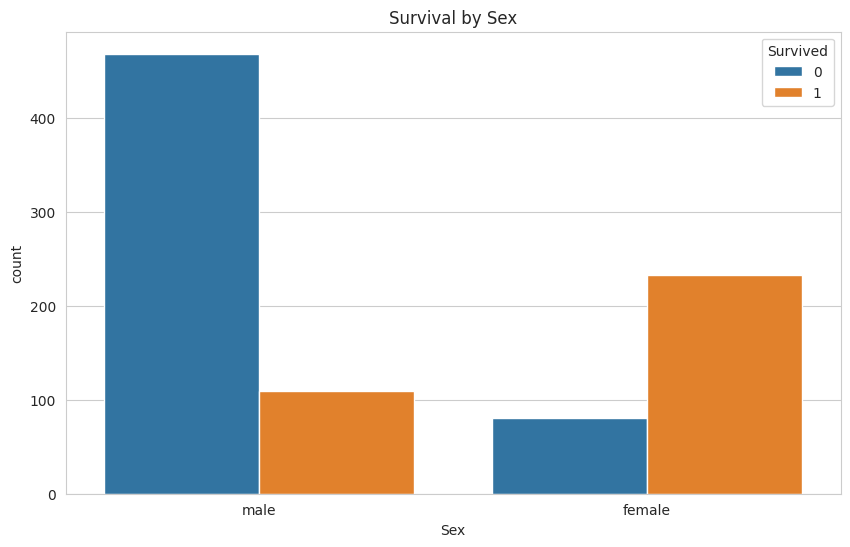

In [16]:
sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.title("Survival by Sex")
plt.show()

Clear result:
Women survived at much higher rates than men.

This strongly suggests that Sex is a key predictor of survival, likely due to evacuation policies.

6.2 Passenger Class vs Survival

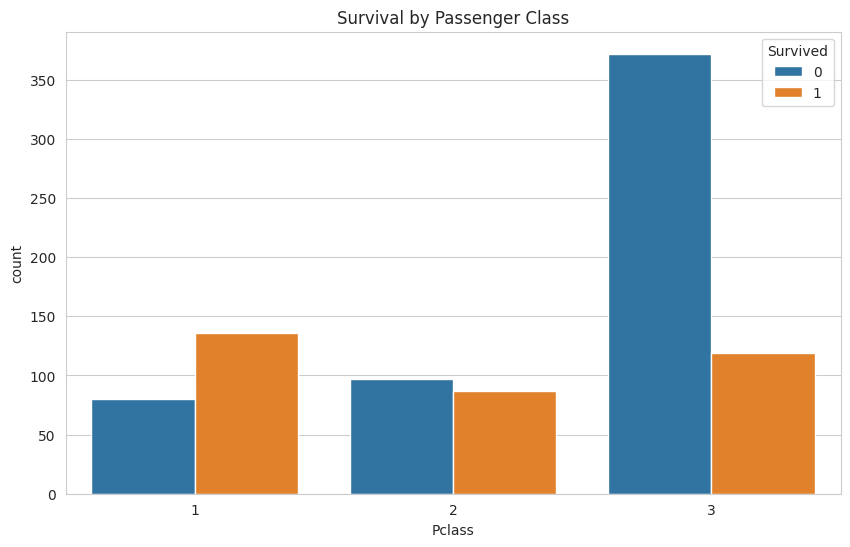

In [17]:
sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.title("Survival by Passenger Class")
plt.show()

Observation:

1st class passengers survive much more often

3rd class passengers die far more frequently

Conclusion:
Socioeconomic status (proxied by class) clearly mattered.

6.3 Age vs Survival

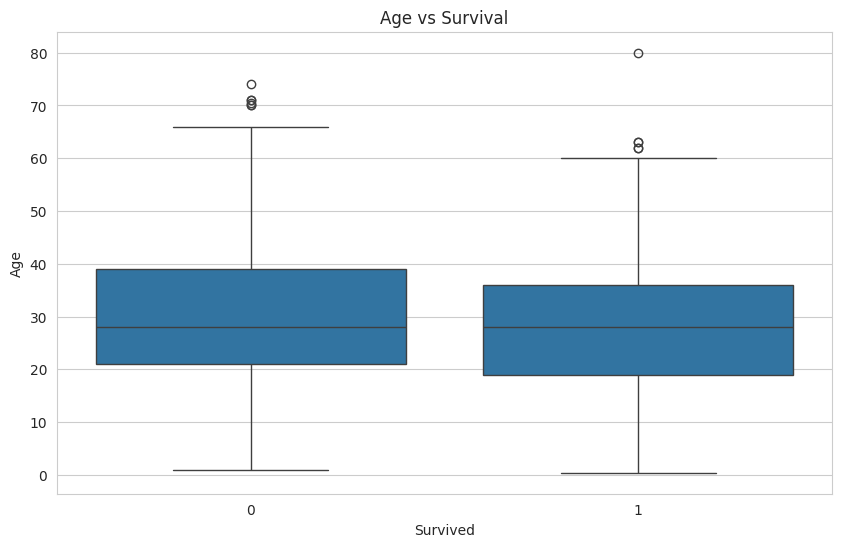

In [18]:
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.title("Age vs Survival")
plt.show()

Interpretation:

Survivors tend to be slightly younger

Children appear to have better survival chances

This aligns with “women and children first”.

#7. Statistical EDA
7.1 Central Tendency and Spread (Age)

In [19]:
print("Mean Age:", round(titanic['Age'].mean(),2))
print("Median Age:", round(titanic['Age'].median(),2))
print("Std Dev Age:", round(titanic['Age'].std(),2))

Mean Age: 29.7
Median Age: 28.0
Std Dev Age: 14.53


Interpretation:

Mean > Median → slight right skew

Std deviation is relatively large compared to the mean → wide age range

7.2 Skewness and Kurtosis

In [20]:
print("Age Skewness:", round(titanic['Age'].skew(),2))
print("Age Kurtosis:", round(titanic['Age'].kurt(),2))

print("Fare Skewness:", round(titanic['Fare'].skew(),2))
print("Fare Kurtosis:", round(titanic['Fare'].kurt(),2))

Age Skewness: 0.39
Age Kurtosis: 0.18
Fare Skewness: 4.79
Fare Kurtosis: 33.4


Key insight:

Fare has extreme skewness and kurtosis

Confirms earlier visual intuition

8. Correlation Analysis

In [21]:
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived']
titanic[numerical_cols].corr()

,Age,Fare,SibSp,Parch,Survived
Age,1.000000,0.096067,-0.308247,-0.189119,-0.077221
Fare,0.096067,1.000000,0.159651,0.216225,0.257307
SibSp,-0.308247,0.159651,1.000000,0.414838,-0.035322
Parch,-0.189119,0.216225,0.414838,1.000000,0.081629
Survived,-0.077221,0.257307,-0.035322,0.081629,1.000000


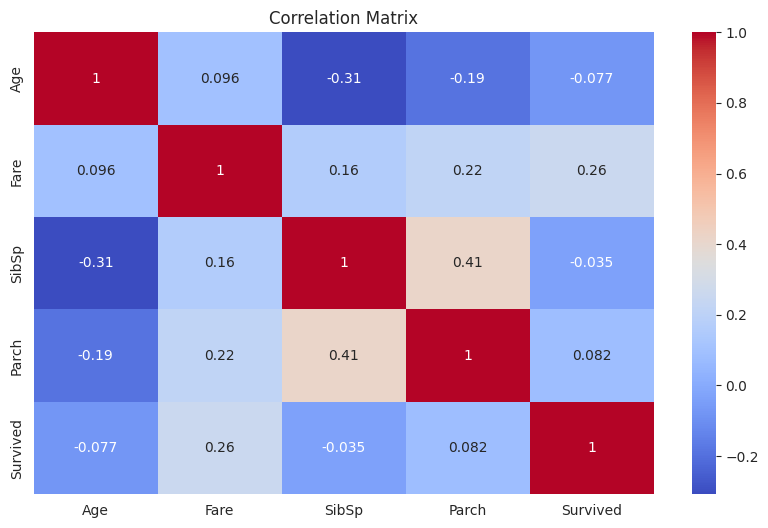

In [22]:
sns.heatmap(titanic[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Observations:

Fare positively correlates with survival

Family size variables (SibSp, Parch) have weak correlations

No strong linear relationship between Age and Fare

9. Missing Value Exploration

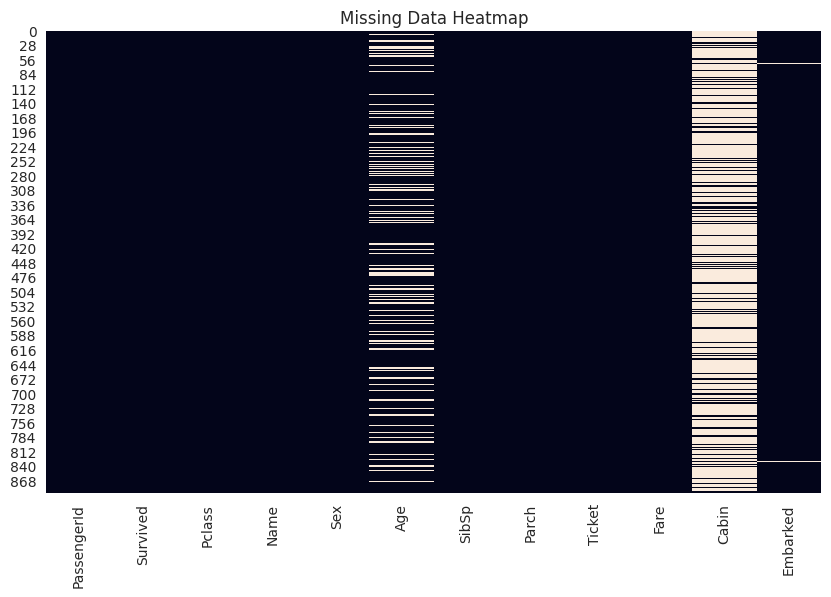

In [23]:
sns.heatmap(titanic.isnull(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

Interpretation:

Cabin is mostly missing → possibly encode as “HasCabin”

Age missingness appears random (likely MAR)

#10. Final Conclusion

This EDA shows that the Titanic dataset contains strong, interpretable structure, not just noise.

Key takeaways from this exploratory process:

Sex and Passenger Class are the strongest predictors of survival

Fare is highly skewed and reflects socioeconomic inequality

Age matters, but not as strongly as policy-driven variables

Missing data is uneven and must be handled thoughtfully

Visual EDA and statistical EDA reinforce each other

Most importantly, this felt like a conversation with the data:
starting with rough plots, noticing oddities, checking them statistically, and refining interpretations step by step.

This dataset is small, but it contains clear social and structural signals, which makes it an excellent learning example for EDA.